In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [154]:
tree = pd.read_csv('tree1.csv')
tree = tree.dropna()

In [155]:
X = tree.iloc[:, 0:23]
y = tree.iloc[:, -1]
y_label = y.values

columns_list = X.columns.tolist()
tree = pd.DataFrame(X, columns = columns_list)
tree['Alive'] = y_label
tree.groupby('Alive').mean() 

,Unnamed: 0.1,Unnamed: 0,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Season
Alive,,,,,,,,,,,,,,,,,,,,,
0,1396.767249,1396.767249,9.596943,2.574236,2.483406,0.085155,1.736681,2016.634061,4.016157,0.151528,...,21.031096,26.862758,1.515310,14.619057,13.406022,11.480349,40.181223,0.692576,0.307424,1.624454
1,1364.103870,1364.103870,9.397149,2.570265,2.511202,0.088088,1.798371,2016.716904,3.808554,0.152749,...,18.327882,27.355211,3.881976,21.076619,18.003992,33.000000,115.500000,0.000000,0.000000,1.083503


In [156]:
segment1 = tree[tree['Lignin'] <= 15]
segment2 = tree[tree['Lignin'] > 15]
fulldata = tree
mms = MinMaxScaler()

In [157]:
#Full model
X_full = fulldata.iloc[:, 0:23] 
y_full = fulldata.iloc[:, -1]
X_full = mms.fit_transform(X_full)
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, 
                                                                        y_full, 
                                                                        train_size = 0.5, 
                                                                        stratify = y_full, 
                                                                        random_state = 0)
print(fulldata.groupby('Alive').count())

       Unnamed: 0.1  Unnamed: 0  Plot  Subplot  Species  Light_ISF  Light_Cat  \
Alive                                                                           
0              2290        2290  2290     2290     2290       2290       2290   
1               491         491   491      491      491        491        491   

       Core  Soil  Sterile  ...   AMF   EMF  Phenolics  Lignin   NSC  Census  \
Alive                       ...                                                
0      2290  2290     2290  ...  2290  2290       2290    2290  2290    2290   
1       491   491      491  ...   491   491        491     491   491     491   

       Time  Event  Harvest  Season  
Alive                                
0      2290   2290     2290    2290  
1       491    491      491     491  

[2 rows x 23 columns]


0.9992810927390366


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

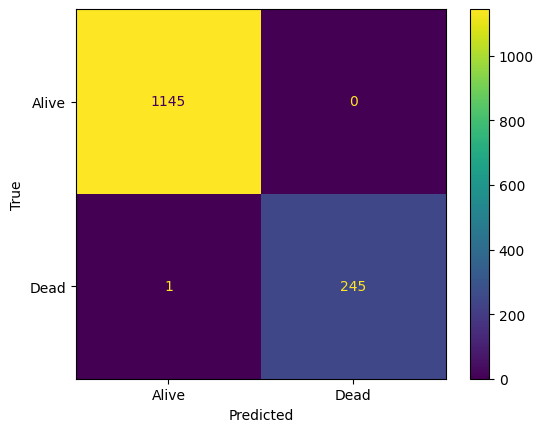

In [158]:
#Full model Tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_full_train, y_full_train)
y_pred_full =clf.predict(X_full_test)

print(accuracy_score(y_full_test,y_pred_full))
cf_matrix = confusion_matrix(y_full_test,y_pred_full)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [159]:
#Segment 1 model: low light ISF
X_low = segment1.iloc[:, 0:23] 
y_low = segment1.iloc[:, -1]
X_low = mms.fit_transform(X_low)
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low,
                                                                    y_low,
                                                                    train_size = 0.5,
                                                                    stratify = y_low, 
                                                                    random_state = 0)
print(segment1.groupby('Alive').count())

       Unnamed: 0.1  Unnamed: 0  Plot  Subplot  Species  Light_ISF  Light_Cat  \
Alive                                                                           
0              1475        1475  1475     1475     1475       1475       1475   
1                21          21    21       21       21         21         21   

       Core  Soil  Sterile  ...   AMF   EMF  Phenolics  Lignin   NSC  Census  \
Alive                       ...                                                
0      1475  1475     1475  ...  1475  1475       1475    1475  1475    1475   
1        21    21       21  ...    21    21         21      21    21      21   

       Time  Event  Harvest  Season  
Alive                                
0      1475   1475     1475    1475  
1        21     21       21      21  

[2 rows x 23 columns]


0.9986631016042781


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

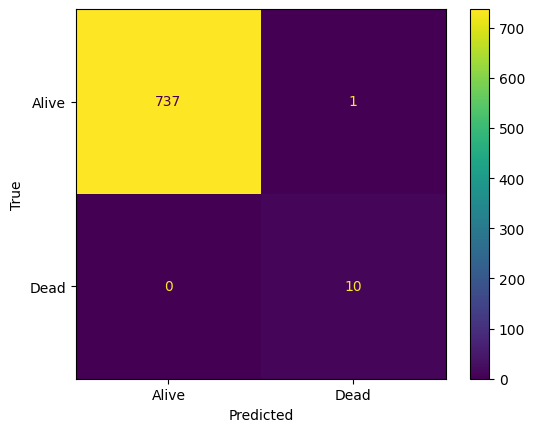

In [160]:
#Segment 1 model tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_low_train, y_low_train)
y_pred_low = clf.predict(X_low_test)

print(accuracy_score(y_low_test,y_pred_low))
cf_matrix = confusion_matrix(y_low_test,y_pred_low)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [161]:
#Segment 2 model: higher light ISF
X_high = segment2.iloc[:, 0:23] 
y_high = segment2.iloc[:, -1]
X_high = mms.fit_transform(X_high)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high,
                                                                        y_high,
                                                                        train_size = 0.5,
                                                                        stratify = y_high,
                                                                        random_state = 0)
print(segment2.groupby('Alive').count())

       Unnamed: 0.1  Unnamed: 0  Plot  Subplot  Species  Light_ISF  Light_Cat  \
Alive                                                                           
0               815         815   815      815      815        815        815   
1               470         470   470      470      470        470        470   

       Core  Soil  Sterile  ...  AMF  EMF  Phenolics  Lignin  NSC  Census  \
Alive                       ...                                             
0       815   815      815  ...  815  815        815     815  815     815   
1       470   470      470  ...  470  470        470     470  470     470   

       Time  Event  Harvest  Season  
Alive                                
0       815    815      815     815  
1       470    470      470     470  

[2 rows x 23 columns]


1.0


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

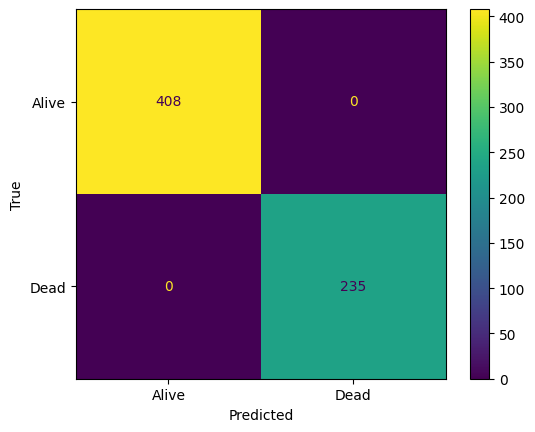

In [162]:
#Segment 2 model Tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_high_train, y_high_train)
y_pred_high = clf.predict(X_high_test)

print(accuracy_score(y_high_test,y_pred_high))
cf_matrix = confusion_matrix(y_high_test,y_pred_high)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [163]:
X_full = fulldata.iloc[:, 0:23] 
clf = KMeans(n_clusters = 3)
clf.fit(X_full)
labels = clf.predict(X_full)

tree['Cluster'] = labels

segment1_clust = tree[tree['Cluster'] == 0]
segment2_clust = tree[tree['Cluster'] == 1]
segment3_clust = tree[tree['Cluster'] == 2]
fulldata = tree
print(tree.groupby('Cluster').mean())

         Unnamed: 0.1   Unnamed: 0       Plot   Subplot   Species  Light_ISF  \
Cluster                                                                        
0          462.500000   462.500000   5.571429  2.594156  2.351732   0.081597   
1         2316.001074  2316.001074  11.705693  2.511278  2.417830   0.091798   
2         1387.500000  1387.500000  11.387689  2.615551  2.695464   0.083580   

         Light_Cat         Core      Soil   Sterile  ...        EMF  \
Cluster                                              ...              
0         1.677489  2016.630952  4.059524  0.180736  ...  25.388820   
1         1.882922  2016.645542  4.000000  0.124597  ...  28.732718   
2         1.681425  2016.669546  3.879050  0.150108  ...  26.714573   

         Phenolics     Lignin        NSC     Census       Time     Event  \
Cluster                                                                    
0         2.450920  18.037706  14.947035  14.515152  50.803030  0.365801   
1         1.477